In [118]:
# Import packages
import pandas as pd

In [119]:
# Load data
df = pd.read_csv('high_diamond_ranked_10min.csv')

In [120]:
# Display basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        9879 non-null   int64  
 1   blueWins                      9879 non-null   int64  
 2   blueWardsPlaced               9879 non-null   int64  
 3   blueWardsDestroyed            9879 non-null   int64  
 4   blueFirstBlood                9879 non-null   int64  
 5   blueKills                     9879 non-null   int64  
 6   blueDeaths                    9879 non-null   int64  
 7   blueAssists                   9879 non-null   int64  
 8   blueEliteMonsters             9879 non-null   int64  
 9   blueDragons                   9879 non-null   int64  
 10  blueHeralds                   9879 non-null   int64  
 11  blueTowersDestroyed           9879 non-null   int64  
 12  blueTotalGold                 9879 non-null   int64  
 13  blu

According to the chart above, we can see that we have all numerical data and no null values to address.

# Data Preparation

In [121]:
# Drop gameId column (this is an identifier for each match -- not useful for our model)
df.drop('gameId', axis=1, inplace=True)
df.head()

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,0,28,2,1,9,6,11,0,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,0,12,1,0,5,5,5,0,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,0,15,0,0,7,11,4,1,1,0,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,0,43,1,0,4,5,5,1,0,1,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,0,75,4,0,6,6,6,0,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


In [122]:
# Create df with no removed features
df_whole = df.copy()

In [123]:
# Create df with our selected features
df_select = df[['blueWins','blueWardsPlaced', 'blueWardsDestroyed', 'blueFirstBlood', 'blueKills', 'blueDeaths', 'blueAssists', 
                'blueDragons', 'blueHeralds', 'blueTowersDestroyed', 'blueTotalMinionsKilled', 'blueTotalJungleMinionsKilled',
                'redWardsPlaced', 'redWardsDestroyed', 'redFirstBlood', 'redKills', 'redDeaths', 'redAssists', 'redDragons', 
                'redHeralds', 'redTowersDestroyed', 'redTotalMinionsKilled', 'redTotalJungleMinionsKilled']]
df_select.head()

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueDragons,blueHeralds,blueTowersDestroyed,...,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redDragons,redHeralds,redTowersDestroyed,redTotalMinionsKilled,redTotalJungleMinionsKilled
0,0,28,2,1,9,6,11,0,0,0,...,6,0,6,9,8,0,0,0,197,55
1,0,12,1,0,5,5,5,0,0,0,...,1,1,5,5,2,1,1,1,240,52
2,0,15,0,0,7,11,4,1,0,0,...,3,1,11,7,14,0,0,0,203,28
3,0,43,1,0,4,5,5,0,1,0,...,2,1,5,4,10,0,0,0,235,47
4,0,75,4,0,6,6,6,0,0,0,...,2,1,6,6,7,1,0,0,225,67


In [124]:
# Drop the features that are duplicates of each other
df_select.drop(columns=['redKills', 'redDeaths', 'redFirstBlood'], 
               inplace=True)
df_select.columns

/var/folders/pq/bdf7q3rs6wg4b89x2qj4l38m0000gn/T/ipykernel_40628/2677585875.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select.drop(columns=['redKills', 'redDeaths', 'redFirstBlood'],


Index(['blueWins', 'blueWardsPlaced', 'blueWardsDestroyed', 'blueFirstBlood',
       'blueKills', 'blueDeaths', 'blueAssists', 'blueDragons', 'blueHeralds',
       'blueTowersDestroyed', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'redWardsPlaced', 'redWardsDestroyed',
       'redAssists', 'redDragons', 'redHeralds', 'redTowersDestroyed',
       'redTotalMinionsKilled', 'redTotalJungleMinionsKilled'],
      dtype='object')

In [125]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

In [126]:
#test train split

X = df_select.drop('blueWins', axis=1)
y = df_select['blueWins']

#scale the data
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [127]:
#train and test a simple logistical regression model to get a baseline 
lr = LogisticRegression(max_iter=5000)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.73      0.72      1624
           1       0.73      0.72      0.72      1637

    accuracy                           0.72      3261
   macro avg       0.72      0.72      0.72      3261
weighted avg       0.72      0.72      0.72      3261



In [128]:
# Define the parameter grid to search over
param_grid = {'C': [0.01, 0.1, 1, 10, 100], 'fit_intercept': [True, False],'penalty': ['l1', 'l2'], 
              'max_iter': [500], 'solver': ['liblinear']}

log_reg = LogisticRegression()

grid_search = GridSearchCV(log_reg, param_grid, cv=5)

grid_search.fit(X_train, y_train)



GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'fit_intercept': [True, False], 'max_iter': [500],
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']})

In [129]:
# Print the best hyperparameters and score
print("Best hyperparameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best hyperparameters:  {'C': 0.01, 'fit_intercept': True, 'max_iter': 500, 'penalty': 'l1', 'solver': 'liblinear'}
Best score:  0.7212152870547346


In [130]:
print("Test score: ", grid_search.score(X_test, y_test))

Test score:  0.7221711131554738


In [131]:
log_reg = LogisticRegression(C=0.01,fit_intercept=True,max_iter=500,penalty='l1',solver='liblinear')
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.72      0.72      1624
           1       0.72      0.72      0.72      1637

    accuracy                           0.72      3261
   macro avg       0.72      0.72      0.72      3261
weighted avg       0.72      0.72      0.72      3261



In [132]:
coefs = log_reg.coef_[0]
coefs

array([ 0.        ,  0.        ,  0.0258909 ,  0.69248633, -0.6518334 ,
        0.        ,  0.08904664,  0.00876136,  0.01889464,  0.16036428,
        0.16987285,  0.        ,  0.        ,  0.        , -0.07350915,
       -0.00907032,  0.        , -0.15095805, -0.07805839])

In [133]:
columns = df_select.drop('blueWins', axis=1).columns
columns

Index(['blueWardsPlaced', 'blueWardsDestroyed', 'blueFirstBlood', 'blueKills',
       'blueDeaths', 'blueAssists', 'blueDragons', 'blueHeralds',
       'blueTowersDestroyed', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'redWardsPlaced', 'redWardsDestroyed',
       'redAssists', 'redDragons', 'redHeralds', 'redTowersDestroyed',
       'redTotalMinionsKilled', 'redTotalJungleMinionsKilled'],
      dtype='object')

In [205]:
indices = np.argsort(coefs)


<BarContainer object of 19 artists>

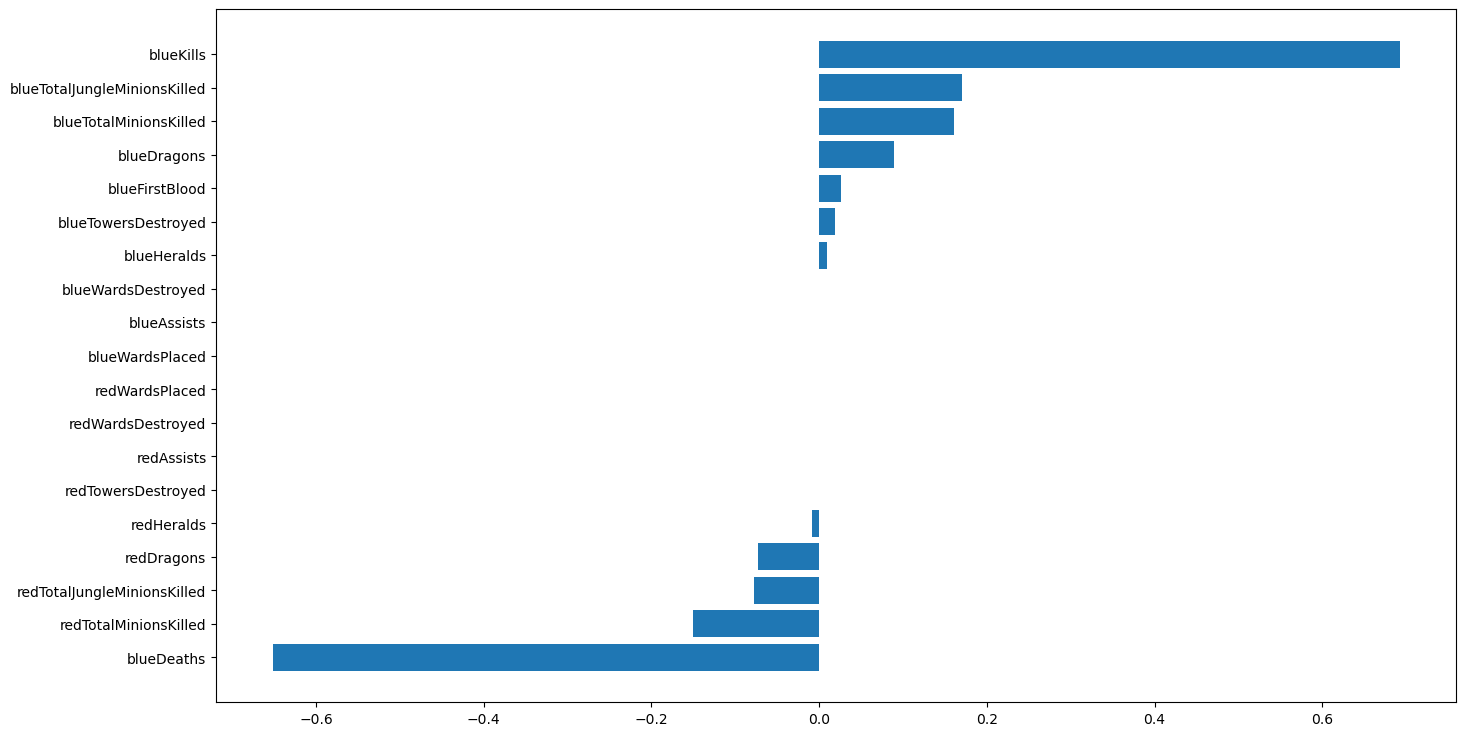

In [206]:
fig, ax = plt.subplots(figsize =(16, 9))
ax.barh(columns[indices], coefs[indices])


<function matplotlib.pyplot.show(close=None, block=None)>

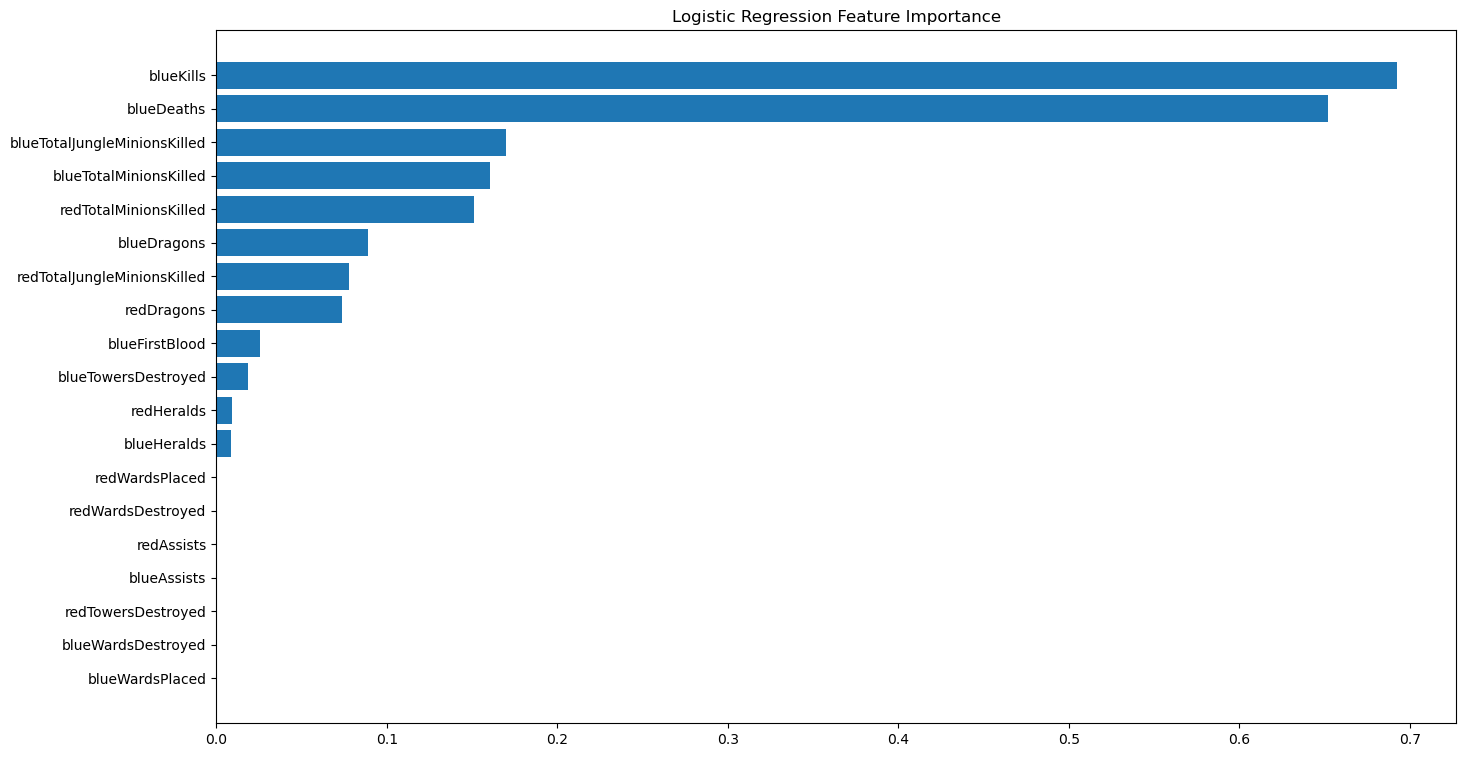

In [210]:
coefs_abs = np.abs(coefs)
indices_abs = np.argsort(coefs_abs)
fig, ax = plt.subplots(figsize =(16, 9))
ax.barh(columns[indices_abs], coefs_abs[indices_abs])
plt.title("Logistic Regression Feature Importance")
plt.show


In [136]:
coefs[indices]

array([ 0.69248633,  0.16987285,  0.16036428,  0.08904664,  0.0258909 ,
        0.01889464,  0.00876136,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        , -0.00907032,
       -0.07350915, -0.07805839, -0.15095805, -0.6518334 ])

In [137]:
columns[indices]

Index(['blueKills', 'blueTotalJungleMinionsKilled', 'blueTotalMinionsKilled',
       'blueDragons', 'blueFirstBlood', 'blueTowersDestroyed', 'blueHeralds',
       'blueWardsDestroyed', 'blueAssists', 'blueWardsPlaced',
       'redWardsPlaced', 'redWardsDestroyed', 'redAssists',
       'redTowersDestroyed', 'redHeralds', 'redDragons',
       'redTotalJungleMinionsKilled', 'redTotalMinionsKilled', 'blueDeaths'],
      dtype='object')

In [138]:
# k fold cross validation 
from sklearn.model_selection import cross_val_score, KFold

In [139]:

kf = KFold(n_splits=5, shuffle=True, random_state=48)

In [140]:
scores = cross_val_score(log_reg, X, y, cv=kf)
scores

array([0.71204453, 0.73582996, 0.7034413 , 0.72469636, 0.73113924])

In [141]:
scores.mean()

0.7214302772510635

In [156]:
# predicting probabilities 

In [168]:
def predict_prob(game):
    game = np.array(game)[1:].reshape(1, 19)
    game = scaler.transform(game)
    probas = log_reg.predict_proba(game)
    return probas

In [190]:
predict_prob(df_select.loc[8])

array([[0.97871274, 0.02128726]])

In [191]:
df_select.loc[8]


blueWins                          0
blueWardsPlaced                  16
blueWardsDestroyed                3
blueFirstBlood                    0
blueKills                         7
blueDeaths                        7
blueAssists                       8
blueDragons                       0
blueHeralds                       0
blueTowersDestroyed               0
blueTotalMinionsKilled          189
blueTotalJungleMinionsKilled     61
redWardsPlaced                   15
redWardsDestroyed                 2
redAssists                        5
redDragons                        1
redHeralds                        1
redTowersDestroyed                0
redTotalMinionsKilled           240
redTotalJungleMinionsKilled      53
Name: 8, dtype: int64